# Logistic Regression

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [2]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)

60000 train samples
10000 test samples
image shape (28, 28)


label:  5


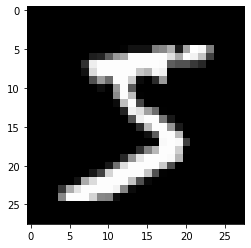

In [3]:
sample = 0
print('label: ', y_train[sample])
image = x_train[sample]

plt.imshow(image, cmap='gray')
plt.show()

In [4]:
input_dim = 28 * 28 #784

x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model

In [5]:
model = keras.Sequential([layers.Dense(num_classes, activation="sigmoid")])

In [6]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 

In [7]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test), verbose = 1)

Epoch 1/10
938/938 [==============================] - 1s 706us/step - loss: 0.9894 - accuracy: 0.7805 - val_loss: 0.6050 - val_accuracy: 0.8616
Epoch 2/10
938/938 [==============================] - 1s 606us/step - loss: 0.5565 - accuracy: 0.8650 - val_loss: 0.4800 - val_accuracy: 0.8804
Epoch 3/10
938/938 [==============================] - 1s 605us/step - loss: 0.4757 - accuracy: 0.8777 - val_loss: 0.4292 - val_accuracy: 0.8894
Epoch 4/10
938/938 [==============================] - 1s 609us/step - loss: 0.4362 - accuracy: 0.8851 - val_loss: 0.4006 - val_accuracy: 0.8964
Epoch 5/10
938/938 [==============================] - 1s 607us/step - loss: 0.4117 - accuracy: 0.8897 - val_loss: 0.3816 - val_accuracy: 0.8999
Epoch 6/10
938/938 [==============================] - 1s 601us/step - loss: 0.3946 - accuracy: 0.8931 - val_loss: 0.3675 - val_accuracy: 0.9021
Epoch 7/10
938/938 [==============================] - 1s 602us/step - loss: 0.3817 - accuracy: 0.8957 - val_loss: 0.3570 - val_accuracy:

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


Number of parameters = 7850: (28 * 28 * 10 + 10 (bias))

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

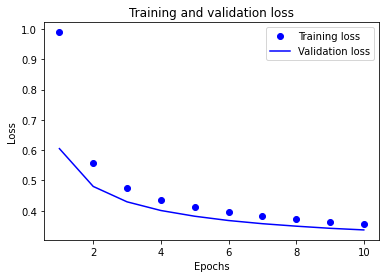

In [10]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.3364495635032654
Test accuracy: 0.9088000059127808


## Train, Validation, Test data

In [12]:
model = keras.Sequential([layers.Dense(num_classes, activation="sigmoid")])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2, verbose = 2)

Epoch 1/10
750/750 - 1s - loss: 1.1009 - accuracy: 0.7413 - val_loss: 0.6598 - val_accuracy: 0.8603
Epoch 2/10
750/750 - 0s - loss: 0.6080 - accuracy: 0.8541 - val_loss: 0.5099 - val_accuracy: 0.8791
Epoch 3/10
750/750 - 0s - loss: 0.5124 - accuracy: 0.8699 - val_loss: 0.4520 - val_accuracy: 0.8859
Epoch 4/10
750/750 - 0s - loss: 0.4662 - accuracy: 0.8785 - val_loss: 0.4191 - val_accuracy: 0.8924
Epoch 5/10
750/750 - 0s - loss: 0.4378 - accuracy: 0.8837 - val_loss: 0.3981 - val_accuracy: 0.8965
Epoch 6/10
750/750 - 0s - loss: 0.4180 - accuracy: 0.8880 - val_loss: 0.3829 - val_accuracy: 0.8991
Epoch 7/10
750/750 - 0s - loss: 0.4032 - accuracy: 0.8909 - val_loss: 0.3714 - val_accuracy: 0.9014
Epoch 8/10
750/750 - 0s - loss: 0.3915 - accuracy: 0.8934 - val_loss: 0.3624 - val_accuracy: 0.9023
Epoch 9/10
750/750 - 0s - loss: 0.3821 - accuracy: 0.8954 - val_loss: 0.3549 - val_accuracy: 0.9051
Epoch 10/10
750/750 - 0s - loss: 0.3742 - accuracy: 0.8967 - val_loss: 0.3485 - val_accuracy: 0.9050

In [13]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.3495998978614807
Test accuracy: 0.90420001745224


## Callbacks

In [15]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

model = keras.Sequential([layers.Dense(num_classes, activation="sigmoid")])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    callbacks = my_callbacks,
                    validation_split=0.2, verbose = 2)

Epoch 1/10
750/750 - 1s - loss: 1.0889 - accuracy: 0.7484 - val_loss: 0.6579 - val_accuracy: 0.8574
Epoch 2/10
750/750 - 0s - loss: 0.6096 - accuracy: 0.8528 - val_loss: 0.5101 - val_accuracy: 0.8762
Epoch 3/10
750/750 - 0s - loss: 0.5139 - accuracy: 0.8695 - val_loss: 0.4526 - val_accuracy: 0.8841
Epoch 4/10
750/750 - 0s - loss: 0.4674 - accuracy: 0.8782 - val_loss: 0.4193 - val_accuracy: 0.8915
Epoch 5/10
750/750 - 0s - loss: 0.4387 - accuracy: 0.8830 - val_loss: 0.3983 - val_accuracy: 0.8962
Epoch 6/10
750/750 - 0s - loss: 0.4187 - accuracy: 0.8873 - val_loss: 0.3828 - val_accuracy: 0.9001
Epoch 7/10
750/750 - 0s - loss: 0.4039 - accuracy: 0.8908 - val_loss: 0.3713 - val_accuracy: 0.9006
Epoch 8/10
750/750 - 0s - loss: 0.3922 - accuracy: 0.8936 - val_loss: 0.3620 - val_accuracy: 0.9034
Epoch 9/10
750/750 - 0s - loss: 0.3827 - accuracy: 0.8955 - val_loss: 0.3545 - val_accuracy: 0.9057
Epoch 10/10
750/750 - 0s - loss: 0.3748 - accuracy: 0.8970 - val_loss: 0.3484 - val_accuracy: 0.9062